In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.shape

(506, 14)

In [6]:
x = df.copy()
x.drop(columns="medv", inplace=True)

y= df["medv"]

print(x.shape, y.shape)

(506, 13) (506,)


In [7]:
import seaborn as sns

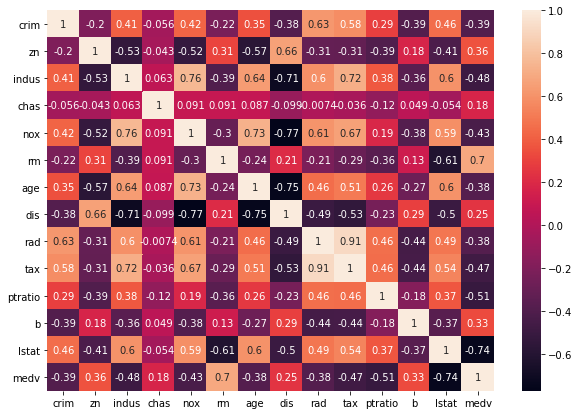

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.corr()["medv"]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [10]:
features = ["indus", "nox", "rm", "tax", "ptratio", "lstat"]
x = x[features]
x.head()

,indus,nox,rm,tax,ptratio,lstat
0,2.31,0.538,6.575,296,15.3,4.98
1,7.07,0.469,6.421,242,17.8,9.14
2,7.07,0.469,7.185,242,17.8,4.03
3,2.18,0.458,6.998,222,18.7,2.94
4,2.18,0.458,7.147,222,18.7,5.33


In [11]:
x.shape

(506, 6)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(x_train)

StandardScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## model building

In [18]:
from keras.models import Sequential
from keras.layers import Dense

for linear regression, we need to have output layer as : (Dense(1, activation="linear")) 

In [25]:
model = Sequential()

model.add(Dense(128, input_shape=(6,), activation="relu"))   # 6 bec we have selected features
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear", name="output"))         # linear bec linear regession

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 10,209
Trainable params: 10,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [28]:
model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 0s 17ms/step - loss: 590.8333 - mae: 22.5305 - val_loss: 568.9437 - val_mae: 21.8307
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 562.8642 - mae: 21.8879 - val_loss: 532.1019 - val_mae: 20.9755
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 517.7043 - mae: 20.8146 - val_loss: 469.4820 - val_mae: 19.4234
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 442.0678 - mae: 18.9209 - val_loss: 368.7720 - val_mae: 16.8180
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 324.8300 - mae: 15.6712 - val_loss: 228.1121 - val_mae: 13.0701
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 180.8094 - mae: 11.6191 - val_loss: 96.3198 - val_mae: 8.0441
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 69.1145 - mae: 6.7460 - val_loss: 51.4026 - val_mae: 5.0193
Epoch 8/100
11/11 [===========================

Epoch 62/100
11/11 [==============================] - 0s 4ms/step - loss: 11.8219 - mae: 2.5409 - val_loss: 11.4867 - val_mae: 2.4535
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 11.5122 - mae: 2.5157 - val_loss: 11.8233 - val_mae: 2.5186
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 11.5711 - mae: 2.5322 - val_loss: 11.2766 - val_mae: 2.3872
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 11.5060 - mae: 2.5185 - val_loss: 11.7851 - val_mae: 2.5346
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 11.1449 - mae: 2.4716 - val_loss: 11.1570 - val_mae: 2.3702
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 11.2847 - mae: 2.4852 - val_loss: 11.3354 - val_mae: 2.4361
Epoch 68/100
11/11 [==============================] - 0s 4ms/step - loss: 10.9275 - mae: 2.4546 - val_loss: 10.7302 - val_mae: 2.3679
Epoch 69/100
11/11 [==============================] - 0s 4ms/s

In [29]:
eval = model.evaluate(x_test, y_test)
eval

4/4 [==============================] - 0s 1ms/step - loss: 25.7270 - mae: 3.1950


[25.727035522460938, 3.1949636936187744]

In [31]:
print("mse : ", eval[0])
print("mae : ", eval[1])

mse :  25.727035522460938
mae :  3.1949636936187744


In [32]:
y_pred = model.predict(x_test)

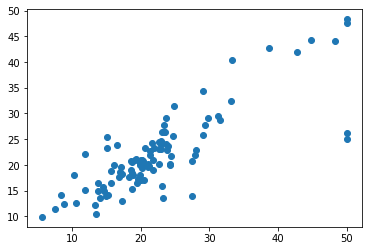

In [34]:
plt.scatter(y_test, y_pred)
plt.show()